# Implementation of Linear Regrassion


- <b>Steps of gradient decent algorithm</b>
    * <b>Given a dataset $X$</b>
    * <b>Random initialize weight vector $W$</b>
    * <b>Loop until converge:-</b>
        * <b>Calculate error :- $E=\frac{1}{2*N}\sum \limits_{i=1} ^{N}{((W*X + b) - Y)^2}$</b>
        * <b>Calculate grad :- $grad_{W}=\frac{1}{N}\sum \limits_{i=1} ^{N}{((W*X + b) - Y)}*X$</b>
        * <b>Update W :-   $W = W - l\_rate*grad$<br>
    
    
<b>NOTE:- we didn't take $b$ rather we take a extra feature in $X$ and assign 1 to it. so that we can reduce extra complexity for $b$</b>

In [8]:
import numpy as np
import pandas as pd

In [9]:
def init_weights(features):
    
    w = np.random.random((features,1))
    return (w)


In [10]:
def regression_training(X, Y, l_rate=0.01,epochs=1000,batch_size=None):
    
    '''
        X: ndim numpy array represents X data
        Y: numpy array represents Y data or labels
        l_rate: float range(0-1) represents learning rate of the model
        epochs: int represents number of maximum iteration
        batch_size: int represents size of batch for mini-batch gradient decent
    '''
    '''
    check if batch_size is correct
    '''
    if batch_size != None:
        assert X.shape[0] % batch_size == 0, "not proper batch size "  
    
    '''
    add extra column for bias term
    '''
    C = pd.DataFrame(data=np.ones((X.shape[0],1)),columns=['1'])
    X = pd.concat([C,X],axis=1)
    rows, cols = X.shape
    '''
    Initialize weights
    '''
    w = init_weights(cols)
    error_rill = []
    previous_error = 0
    count = 0
    if batch_size == None:
        for _ in range(epochs):

            Y_hat = X.dot(w)
            error = round(float(1/2 * np.mean(np.subtract(Y_hat,Y)**2)),5)
            grad = 1/rows * (X.T).dot(np.subtract(Y_hat,Y))
            error_rill.append(error)
            w = np.subtract(w,l_rate*grad)
            '''
            check convergance
            '''
            if(previous_error == error):
                count += 1
            else:
                count = 0
            if count == 10:
                break
            previous_error = error
    else:

        for _ in range(epochs):
            start = 0
            error = []
            for i in range(rows//batch_size):
                e = 0
                Y_hat = X[start:start+batch_size].dot(w)
                e = round(
                    float(1/2 * np.mean(
                        np.subtract(Y_hat,Y[start:start+batch_size])**2)),5)
                grad = 1/batch_size * (X[start:start+batch_size].T).dot(np.subtract(Y_hat,Y[start:start+batch_size]))
                error.append(e)
                error_rill.append(e)
                w = np.subtract(w,l_rate*grad)
                start += batch_size
            e = round(sum(error)/len(error),5)
            if previous_error == e:
                count += 1
            else:
                count = 0
            if count == 10:
                break
            previous_error = e
    return w,error_rill
        
    

In [11]:
def test(W,X):
    X = X.copy()
    X['1'] = 1
    return(X.dot(W))

In [12]:
from sklearn.datasets import load_boston
data = load_boston()

In [13]:
X = pd.DataFrame(data=data.data,columns=data.feature_names)
Y = pd.DataFrame(data=data.target,columns=['label'])
X = (X - X.mean())/X.std()

In [15]:
w1,error1 = regression_training(X,Y,batch_size=None,epochs=10000)
w2,error2 = regression_training(X[:500],Y[:500],batch_size=100,epochs=10000)

In [16]:
import matplotlib.pyplot as plt

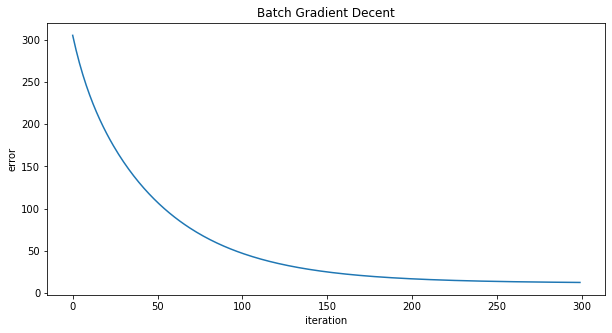

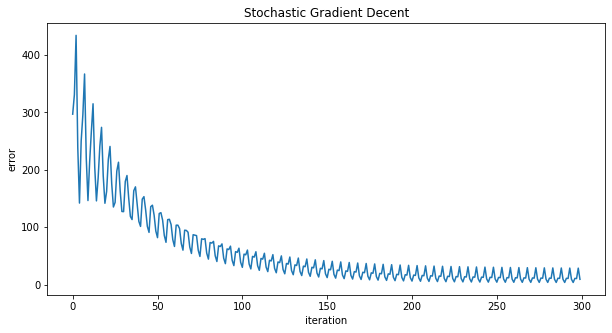

In [17]:
plt.figure(figsize=(10,5))
plt.plot(error1[:300])
plt.xlabel("iteration")
plt.ylabel("error")
plt.title("Batch Gradient Decent")
plt.figure(figsize=(10,5))
plt.plot(error2[:300:])
plt.xlabel("iteration")
plt.ylabel("error")
plt.title("mini-batch Gradient Decent")
plt.show()

Above is the <b>Simple Linear Regression</b>.<br>
We have some varient of <b>Simple Linear Regression</b> like <b>Ridge Regression, Lasso Regression, Electric-Net</b><br>
Where the <b>Error</b> function is different and these are more generalized than <b>Simple Linear Regression</b>.<br>
<br>
- <b>Error function</b><br>
    * <b>Ridge Regression :-$\;\;$error$\;\;$$=$$\;\;$$\frac{1}{2*N}\sum \limits_{i=1} ^{N}{(W*X + b - Y)^2} + \alpha*$$ \lVert W \rVert_{2}^2 $</b><br>
    * <b>Lasso Regression :-$\;\;$error$\;\;$$=$$\;\;$$\frac{1}{2*N}\sum \limits_{i=1} ^{N}{(W*X + b - Y)^2} + \alpha*$$ \lVert W \rVert_{1} $$
$</b><br>
    * <b>Electric-Net Regression :-$\;\;$error$\;\;$$=$$\;\;$$\frac{1}{2*N}\sum \limits_{i=1} ^{N}{(W*X + b - Y)^2} + \alpha*\rho*$$ \lVert W \rVert_{1} + \frac{\alpha*(1-\rho)}{2}* \lVert W \rVert_{2}$$
$</b><br>
<br>
<b>NOTE:- here $\alpha$ and $\rho$ are two hyper-parameter

# THE END